In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
import pytesseract

In [2]:
from src.image_handler import *
from src.processing import *

## processing

#### Raw image

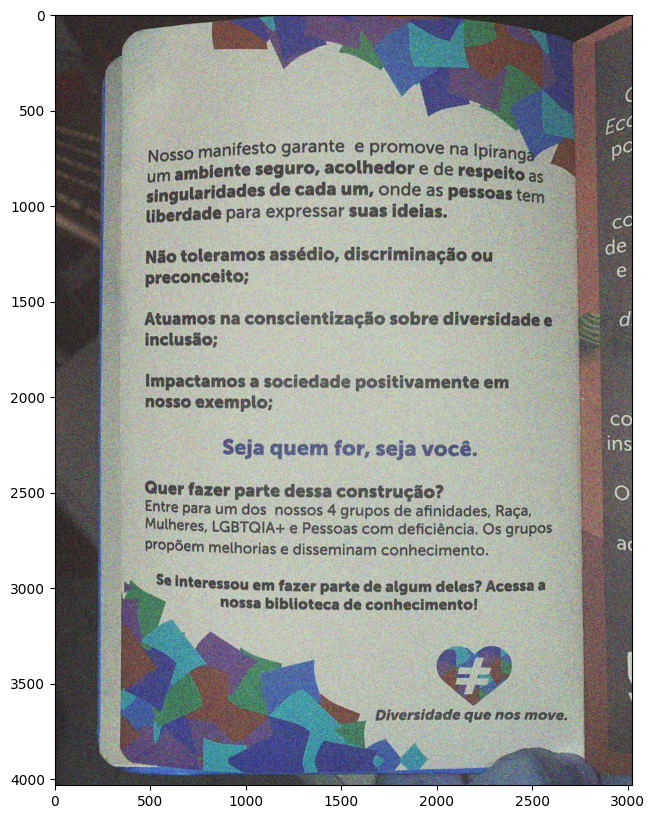

In [3]:
raw = read_image()
show(raw)

### Processing

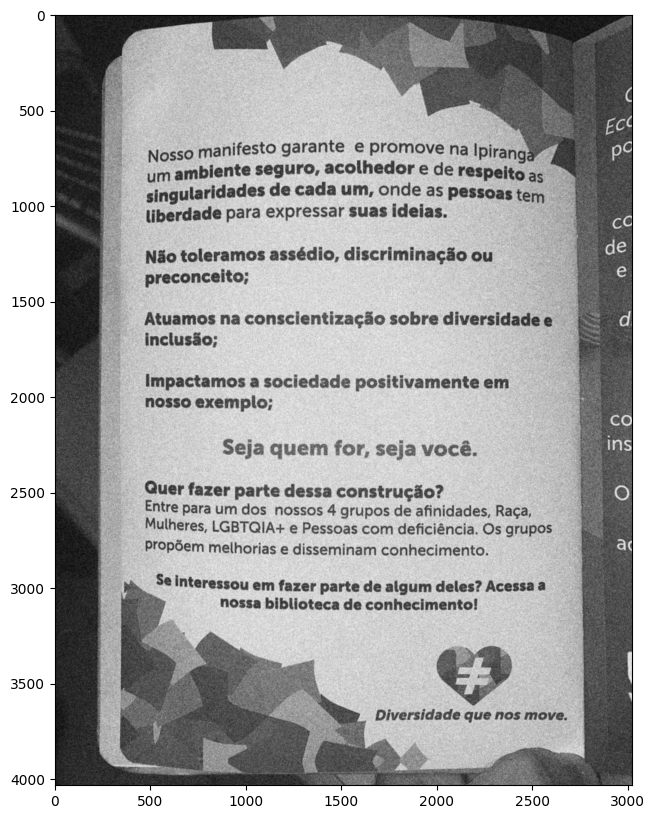

In [4]:
grey = get_greyscale(raw)
gauss = gaussian(grey, 9, 9)

show(gauss)

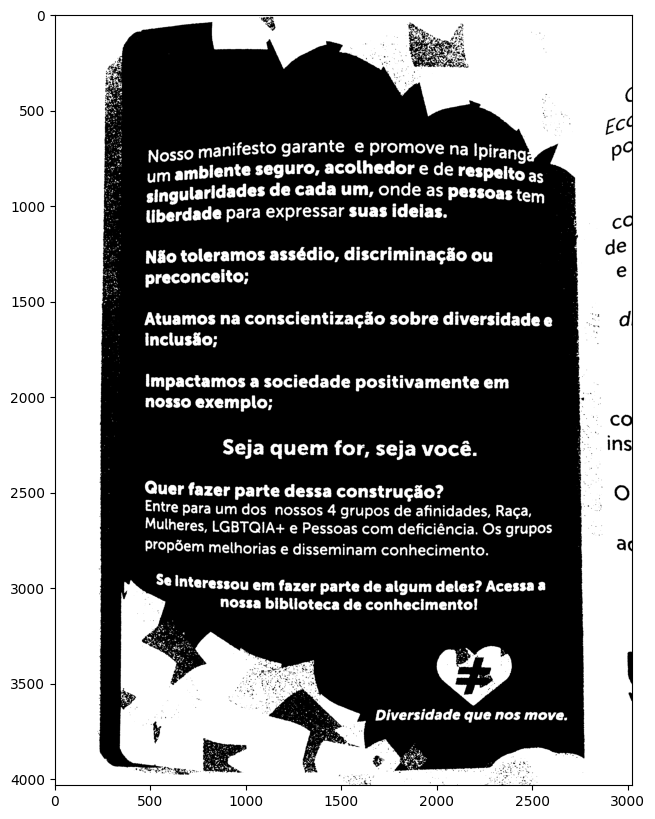

In [5]:
thres = thresholding(gauss)
#thres = gaussian_thresholding(grey)

show(thres)

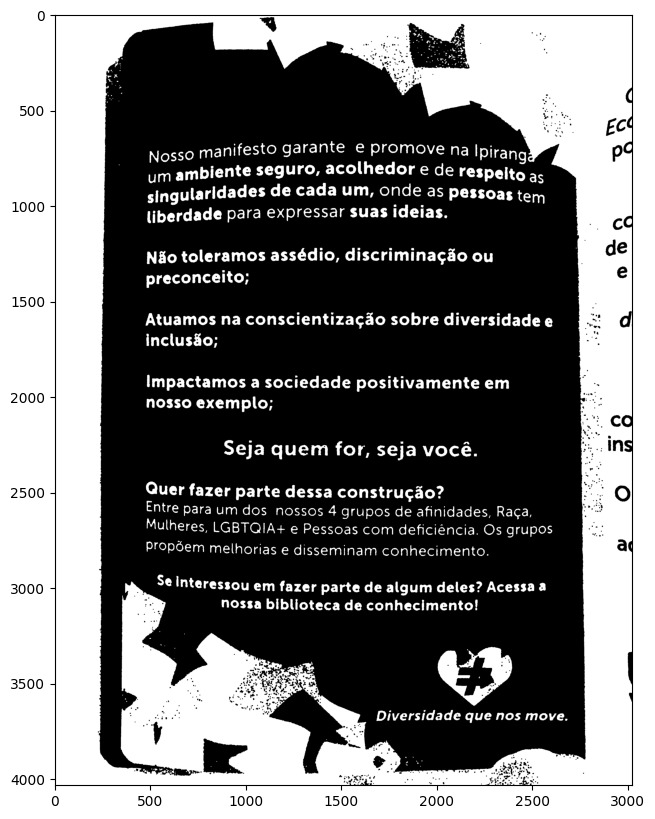

In [6]:
#processed = erode(thres, iterations=2)
processed = thres
processed = erode(processed, iterations=5)
processed = dilate(processed, iterations=2)

show(processed)

## Character Segmentation

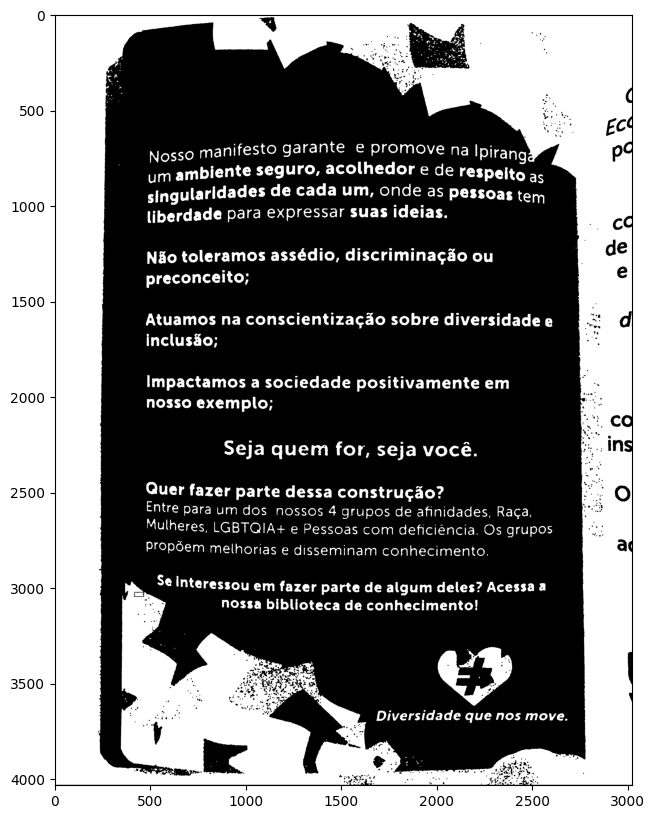

In [7]:
show(get_word_boxes(processed.copy()))

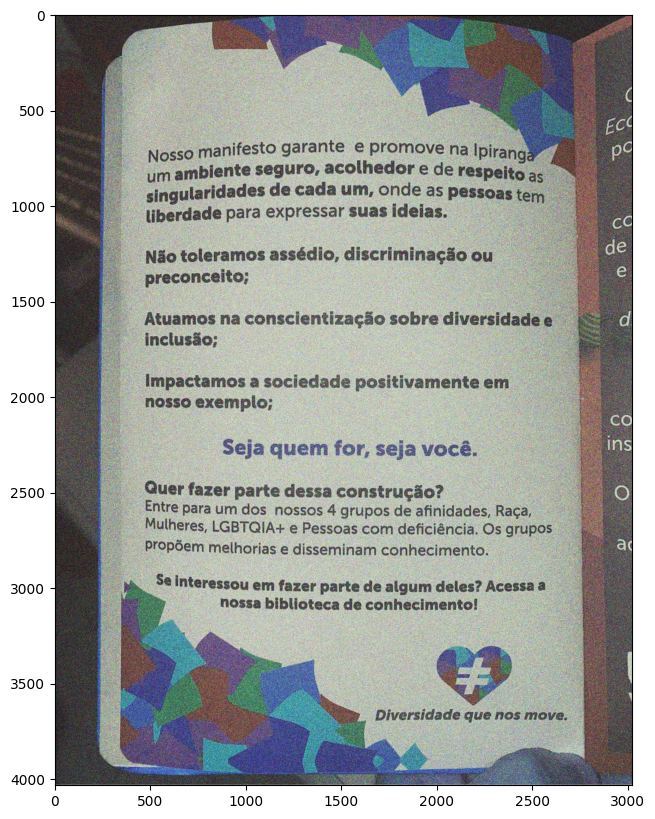

In [8]:
show(get_word_boxes(raw.copy(), (255,255,255)))

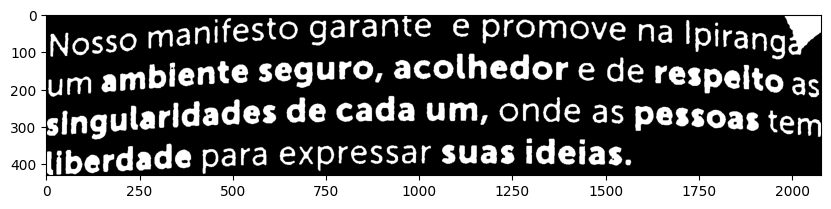

Nosso manifesto garante e promove na TALE é
um ambiente seguro, acolhedor e de respeito as
singularidades de cada um, onde as pessoas tem
liberdade para expressar suas ideias.



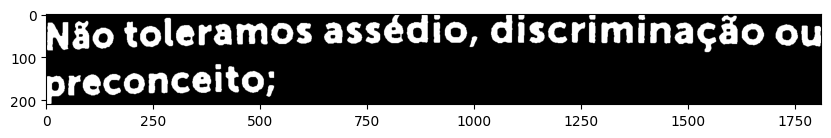

Não toleramos assédio, discriminação ou
preconceito;



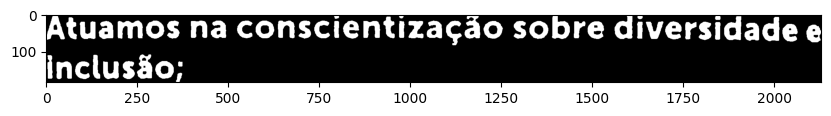

Atuamos na conscientização sobre diversidade e
inclusão:



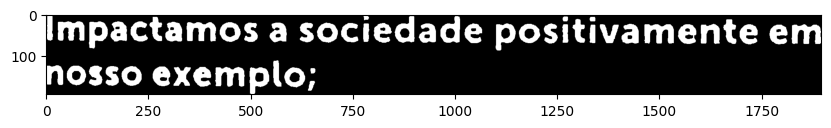

Impactamos a sociedade positivamente em
nosso exemplo;



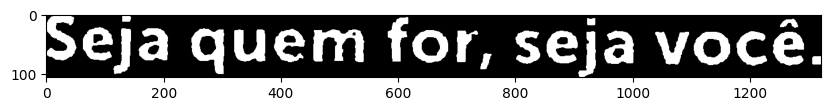

Seja quem for, seja você.



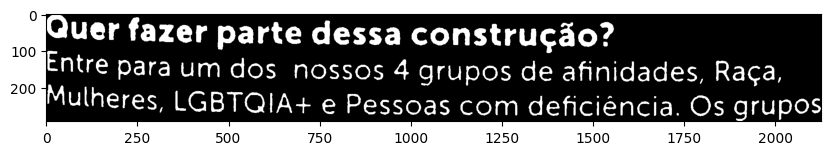

Quer fazer parte dessa construção?
Entre para um dos nossos 4 grupos de afinidades, Raça,
Mulheres, LGBTQIA+ e Pessoas com deficiência. Os grupos



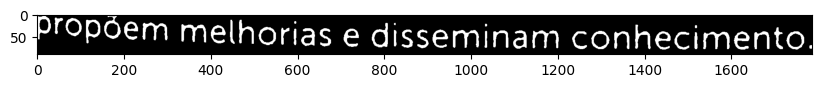

Propóem melhorias e disseminam conhecimento.



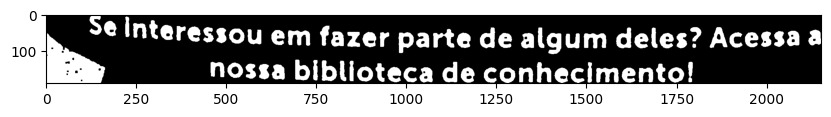

AACS RR SAS; parte de algum deles? Acessa a

nossa biblioteca de conhecimento!



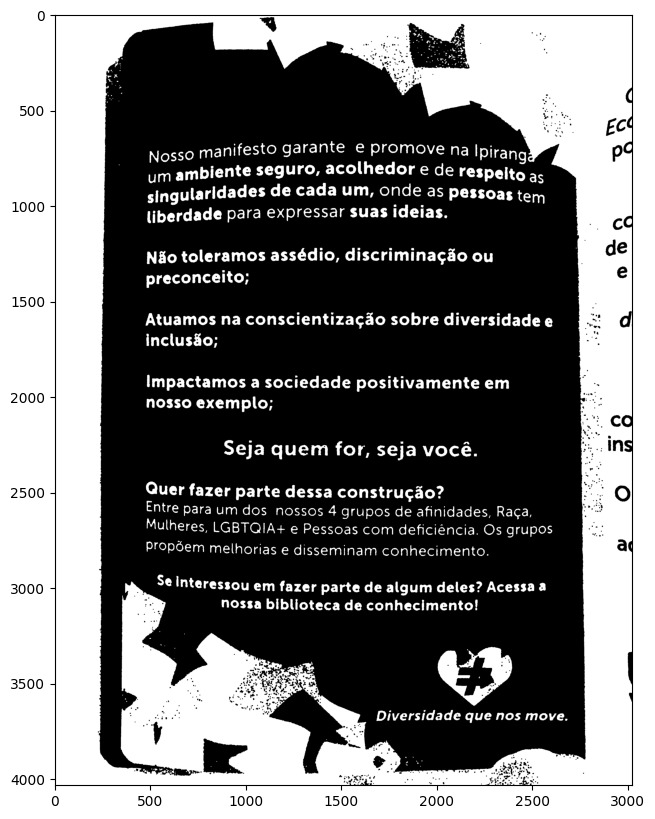

Nosso manifesto garante e promove na Ipirangá
Dra Tu lo] DELAS DS Dale acolhedor e de respeito as
singularidades de cada um, onde as pessoas tem
liberdade para expressar suas ideias.

Não toleramos assédio, discriminação ou
olacfeto (oiço h

Atuamos na conscientização sobre diversidade e
inclusão;

Impactamos a sociedade positivamente em
nosso exemplo;

Seja quem for, seja você.

Quer fazer parte dessa construção?
Entre para um dos nossos 4 grupos de afinidades, Raça,
Mulheres, LGBTQIA+ e Pessoas com deficiência. Os grupos

Propóem melhorias e disseminam conhecimento.

q SACI TE TRATA parte de algum deles? Acessa a
, nossa biblioteca de conhecimento!

 



'Nosso manifesto garante e promove na Ipirangá\nDra Tu lo] DELAS DS Dale acolhedor e de respeito as\nsingularidades de cada um, onde as pessoas tem\nliberdade para expressar suas ideias.\n\nNão toleramos assédio, discriminação ou\nolacfeto (oiço h\n\nAtuamos na conscientização sobre diversidade e\ninclusão;\n\nImpactamos a sociedade positivamente em\nnosso exemplo;\n\nSeja quem for, seja você.\n\nQuer fazer parte dessa construção?\nEntre para um dos nossos 4 grupos de afinidades, Raça,\nMulheres, LGBTQIA+ e Pessoas com deficiência. Os grupos\n\nPropóem melhorias e disseminam conhecimento.\n\nq SACI TE TRATA parte de algum deles? Acessa a\n, nossa biblioteca de conhecimento!\n\n \n\x0c'

In [9]:
img_dict = get_data(processed)
segments = list()
segments_txt = list()

for i in range(len(img_dict['text'])):
    (x, y, w, h) = (img_dict['left'][i], img_dict['top'][i], img_dict['width'][i], img_dict['height'][i])
    crop_img = processed[y:y+h, x:x+w]
    if img_dict['level'][i] == 2:
        segments.append(crop_img)
        show(crop_img)
        #print(img_dict['text'][i])
        segment_txt = ocr(crop_img)
        segments_txt.append(segment_txt)
        print(segment_txt)
        
segments_txt.pop()

## OCRing

In [10]:
raw_text = ocr(raw)
processed_text = ocr(processed)
segmented_text = ' '.join(segments_txt)

## Postprocessing

### Raw image text

In [11]:
raw_text_pp = remove_double_spaces(' '.join(remove_special(raw_text)))
raw_text_pp = remove_single_letters(raw_text_pp, keep_e=True, keep_a=True)
print(raw_text_pp)

### Processed image text

In [12]:
processed_text_pp = remove_double_spaces(' '.join(remove_special(processed_text)))
processed_text_pp = remove_single_letters(processed_text_pp, keep_e=True, keep_a=True)
print(processed_text_pp)

Nosso manifesto garante e promove na Ipirangá Dra Tu lo DELAS DS Dale acolhedor e de respeito as singularidades de cada um onde as pessoas tem liberdade para expressar suas ideias Não toleramos assédio discriminação ou olacfeto oiço  Atuamos na conscientização sobre diversidade e inclusão Impactamos a sociedade positivamente em nosso exemplo Seja quem for seja você Quer fazer parte dessa construção Entre para um dos nossos  grupos de afinidades Raça Mulheres LGBTQIA+ e Pessoas com deficiência Os grupos Propóem melhorias e disseminam conhecimento  SACI TE TRATA parte de algum deles Acessa a nossa biblioteca de conhecimento 


### Processed and Segmented image text

In [13]:
segmented_text = remove_breaks(segmented_text, add_space=True)
segmented_text = remove_double_spaces(segmented_text)
segmented_text = remove_single_letters(segmented_text)
print(segmented_text)

Nosso manifesto garante promove na TALE um ambiente seguro, acolhedor de respeito as singularidades de cada um, onde as pessoas tem liberdade para expressar suas ideias. Não toleramos assédio, discriminação ou preconceito; Atuamos na conscientização sobre diversidade inclusão: Impactamos sociedade positivamente em nosso exemplo; Seja quem for, seja você. Quer fazer parte dessa construção? Entre para um dos nossos grupos de afinidades, Raça, Mulheres, LGBTQIA+ Pessoas com deficiência. Os grupos Propóem melhorias disseminam conhecimento. AACS RR SAS; parte de algum deles? Acessa nossa biblioteca de conhecimento! 
